Load and inspect

In [10]:
 
import pandas as pd

df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])



 2. Summary Statistics & Missing-Value Report

Outlier Detection 

 2. Summary Statistics & Missing-Value Report

In [11]:
# Summary statistics
df.describe()

# Missing values
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)

# Columns with >5% nulls
null_percent = (missing / len(df)) * 100
high_nulls = null_percent[null_percent > 5]


OUTLAIER DETECTION 

3. Outlier Detection & Basic Cleaning

In [12]:
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Optional: mark or drop outliers
df_clean = df[~outliers]


In [14]:
# Impute using median
df_clean[columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())

C:\Users\HP\AppData\Local\Temp\ipykernel_15604\2983871764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())


Impute or Drop Missing:

In [15]:
# Make a proper deep copy to avoid the warning
df_clean = df[~outliers].copy()

# Now impute safely using .loc
df_clean.loc[:, columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())


 4. Time Series Analysis

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

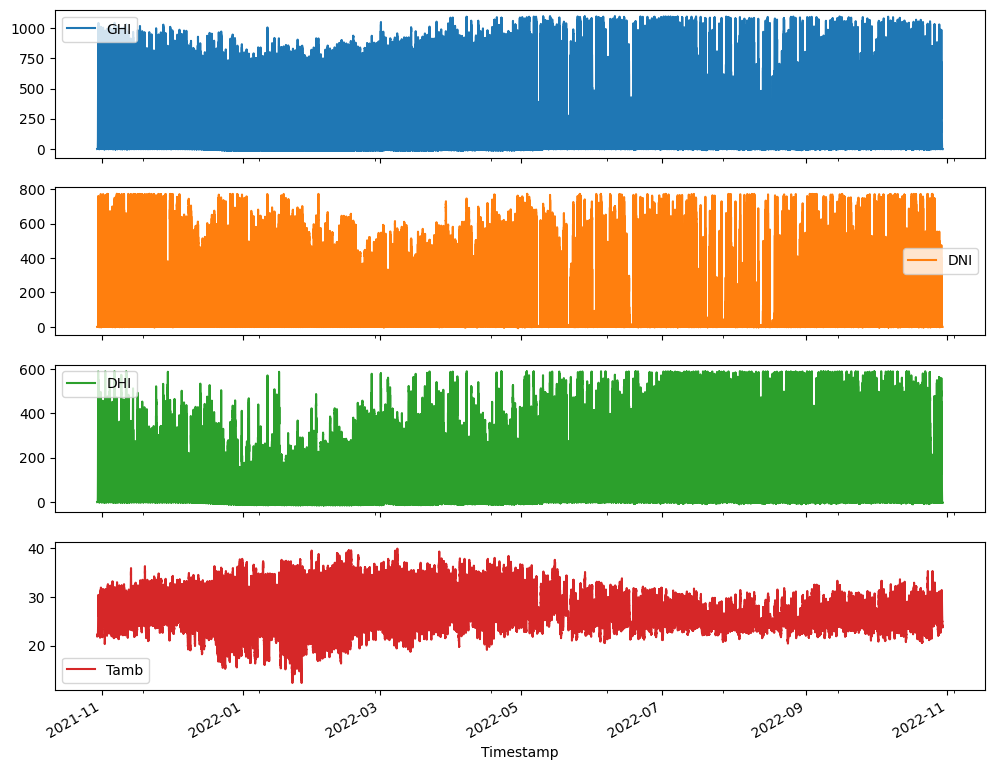

In [16]:
import matplotlib.pyplot as plt

df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 10))


4. Time Series Analysis

<Axes: xlabel='Timestamp'>

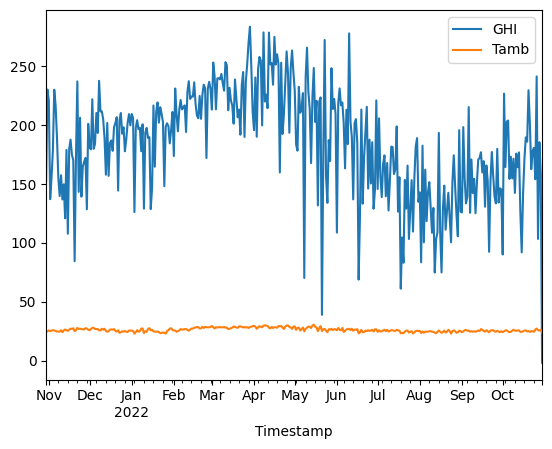

In [17]:
df_clean.set_index('Timestamp').resample('D').mean()[['GHI', 'Tamb']].plot()


5. Cleaning Impact

<Axes: title={'center': 'ModA & ModB Avg Pre/Post Cleaning'}, xlabel='Cleaning'>

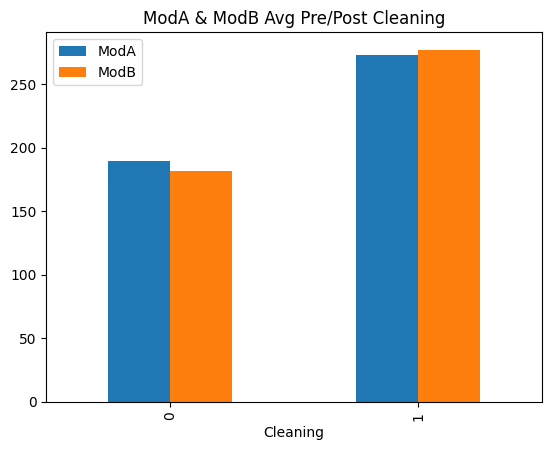

In [18]:
import seaborn as sns

df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA & ModB Avg Pre/Post Cleaning')


 6. Correlation & Relationship Analysis

 
Heatmap:

<Axes: >

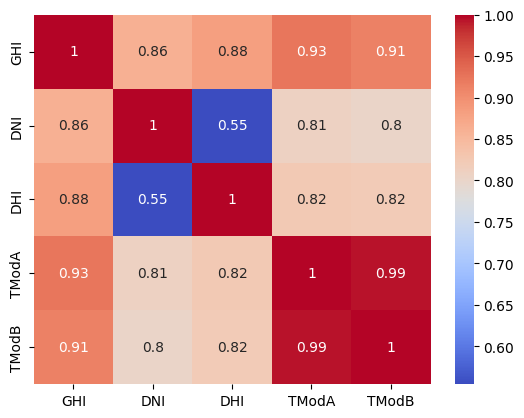

In [19]:
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')


Scatter Plots:

<Axes: xlabel='WS', ylabel='GHI'>

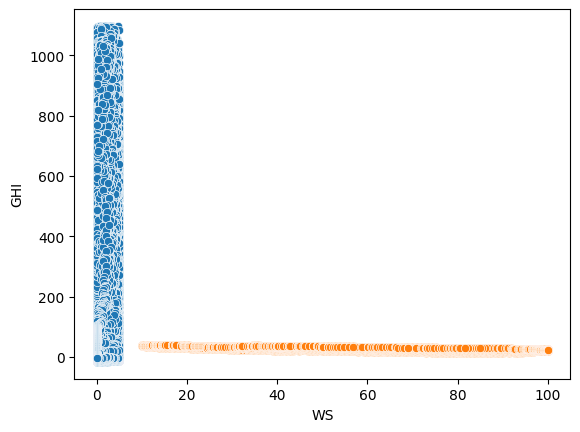

In [20]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')


 7. Wind & Distribution Analysis

In [21]:
!pip install windrose



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


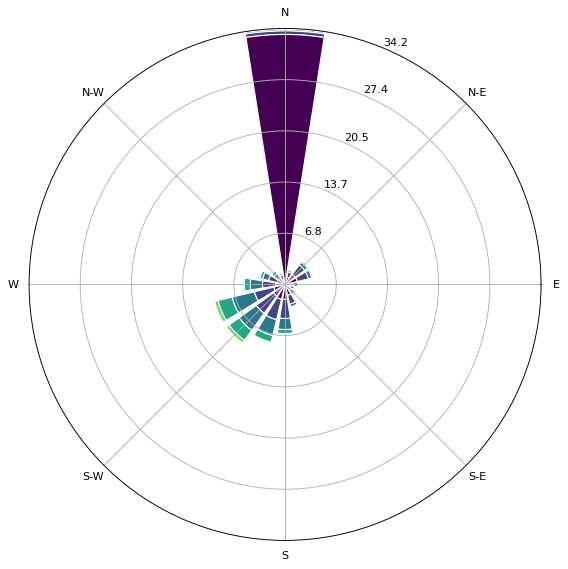

In [22]:
# Use Windrose Toolkit or matplotlib's polar plots
# pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')


Histogram:

<Axes: >

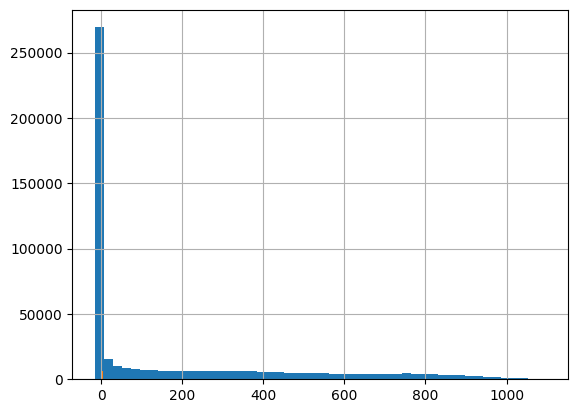

In [23]:
df_clean['GHI'].hist(bins=50)
df_clean['WS'].hist(bins=50)


8. Temperature Analysis

<Axes: xlabel='RH', ylabel='Tamb'>

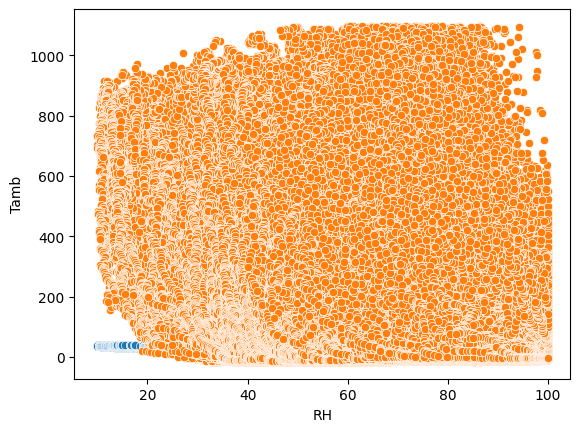

In [24]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
sns.scatterplot(data=df_clean, x='RH', y='GHI')


9. Bubble Chart

Text(0.5, 1.0, 'GHI vs Tamb with RH as bubble size')

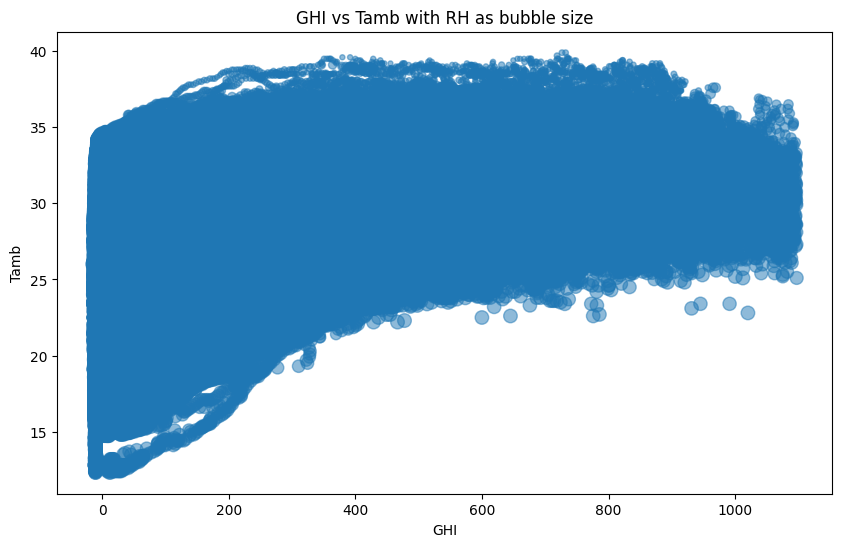

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with RH as bubble size')


 Optional Enhancements (KPIs for extra credit)

<Axes: xlabel='hour'>

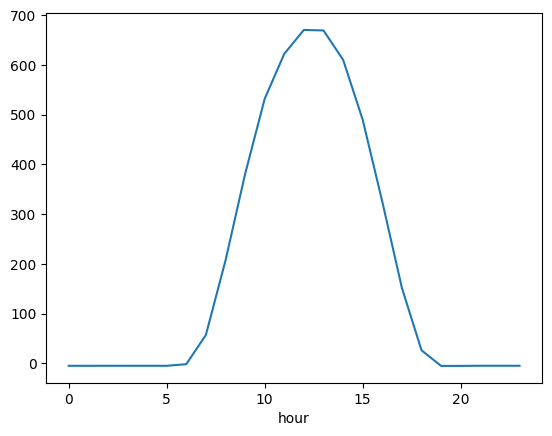

In [26]:
df_clean['hour'] = df_clean['Timestamp'].dt.hour
df_clean.groupby('hour')['GHI'].mean().plot()
